In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [27]:
og_data = pd.read_csv("DS_salary_factors.csv")
# display(gdp_df.head())


In [28]:
og_data.head(60)


,GeoFips,GeoName,2022 GDP,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area,...,Wholesale trade,Farm proprietors employment,Government and government enterprises,Nonfarm proprietors employment 2/,Private nonfarm employment,Farm employment,Nonfarm employment,Proprietors employment,Wage and salary employment,Total employment (number of jobs)
0,1000,Alabama,108.860,4028389,2283890,56.7,2223904,55.2,59986,2.6,...,87542,33784,407746,682135,2420981,41204,2828727,715919,2154012,2869931
1,2000,Alaska,93.958,547752,356433,65.1,343184,62.7,13249,3.7,...,7362,865,102368,107642,353827,1492,456195,108507,349180,457687
2,4000,Arizona,121.127,5911209,3640559,61.6,3494698,59.1,145861,4.0,...,126540,17524,445732,1063401,3814128,27735,4259860,1080925,3206670,4287595
3,5000,Arkansas,110.876,2390778,1373033,57.4,1325681,55.4,47352,3.4,...,56945,37615,220672,386590,1482274,52590,1702946,424205,1331331,1755536
4,6000,California,115.578,31110628,19272358,61.9,18482096,59.4,790262,4.1,...,773657,55474,2779431,6431184,22293357,228186,25072788,6486658,18814316,25300974
5,8000,Colorado,118.819,4703862,3198338,68.0,3109208,66.1,89130,2.8,...,129913,34941,517461,1149950,3621257,49226,4138718,1184891,3003053,4187944
6,9000,Connecticut,101.020,2952896,1914328,64.8,1838121,62.2,76207,4.0,...,69512,4936,240099,658897,2142109,9738,2382208,663833,1728113,2391946
7,10000,Delaware,108.075,828264,495435,59.8,472405,57.0,23030,4.6,...,14387,1852,76492,167234,571527,3205,648019,169086,482138,651224
8,11000,District of Columbia,107.246,551770,388214,70.4,371865,67.4,16349,4.2,...,5966,0,248807,126132,655952,0,904759,126132,778627,904759
9,12000,Florida,120.058,18330654,10839794,59.1,10548993,57.5,290801,2.7,...,447827,38372,1194604,4390494,12962841,69807,14157445,4428866,9798386,14227252


In [29]:
og_data.shape


(51, 64)

In [30]:
state_names = og_data["GeoName"]


In [31]:
# select columns
og_data.columns


Index(['GeoFips', 'GeoName', '2022 GDP',
       'Total Civilian Non-Institutional Population in State/Area',
       'Total Civilian Labor Force in State/Area',
       'Percent (%) of State/Area's Population',
       'Total Employment in State/Area',
       'Percent (%) of Labor Force Employed in State/Area',
       'Total Unemployment in State/Area',
       'Percent (%) of Labor Force Unemployed in State/Area', '2022 Median',
       'Poverty (thousands)', 'Poverty Percent', 'Per Bach or Higher',
       'Employer Insured', 'Non-Group Insured', 'Medicaid Insured',
       'Medicare Insured', 'Military Insured', 'Uninsured', '2020 Life Expect',
       'Violent crime rate per 100,000 people',
       'Property crime rate per 100,000 people', 'percent informal_vol',
       'percent formal_vol', 'percent Good Air Quality Days',
       'Gas Tax (cents)', 'Internet Access Percent 2021', 'Happiness',
       'A_MEDIAN', 'A_MEAN', 'Local government', 'State government',
       'Accommodation and fo

In [32]:
# split data into labels and actual data
data_labels_df = og_data[["GeoFips", "GeoName"]]

# select the remaining columns into another DataFrame
data_only_df = og_data.drop(columns=["GeoFips", "GeoName"])


In [33]:
# convert 0s to NaN for imputation
# replace 0s with NaN in the remaining_columns_df DataFrame
data_only_df.replace(0, np.nan, inplace=True)

# create a SimpleImputer object with strategy='median'
imputer = SimpleImputer(strategy="median")

# fit the imputer on the data
imputer.fit(data_only_df)

# impute the missing values in the remaining columns DataFrame
data_only_df_imputed = pd.DataFrame(
    imputer.transform(data_only_df), columns=data_only_df.columns
)

# display the imputed DataFrame
display(data_only_df_imputed.head())


,2022 GDP,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area,2022 Median,Poverty (thousands),...,Wholesale trade,Farm proprietors employment,Government and government enterprises,Nonfarm proprietors employment 2/,Private nonfarm employment,Farm employment,Nonfarm employment,Proprietors employment,Wage and salary employment,Total employment (number of jobs)
0,108.860,4028389.0,2283890.0,56.7,2223904.0,55.2,59986.0,2.6,59910.0,738.0,...,87542.0,33784.0,407746.0,682135.0,2420981.0,41204.0,2828727.0,715919.0,2154012.0,2869931.0
1,93.958,547752.0,356433.0,65.1,343184.0,62.7,13249.0,3.7,89740.0,81.0,...,7362.0,865.0,102368.0,107642.0,353827.0,1492.0,456195.0,108507.0,349180.0,457687.0
2,121.127,5911209.0,3640559.0,61.6,3494698.0,59.1,145861.0,4.0,73450.0,876.0,...,126540.0,17524.0,445732.0,1063401.0,3814128.0,27735.0,4259860.0,1080925.0,3206670.0,4287595.0
3,110.876,2390778.0,1373033.0,57.4,1325681.0,55.4,47352.0,3.4,53980.0,475.0,...,56945.0,37615.0,220672.0,386590.0,1482274.0,52590.0,1702946.0,424205.0,1331331.0,1755536.0
4,115.578,31110628.0,19272358.0,61.9,18482096.0,59.4,790262.0,4.1,85300.0,4439.0,...,773657.0,55474.0,2779431.0,6431184.0,22293357.0,228186.0,25072788.0,6486658.0,18814316.0,25300974.0


In [34]:
display(data_labels_df.head())
display(len(data_labels_df))
display(data_only_df_imputed.head())
print(data_only_df_imputed.shape)


,GeoFips,GeoName
0,1000,Alabama
1,2000,Alaska
2,4000,Arizona
3,5000,Arkansas
4,6000,California


51

,2022 GDP,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area,2022 Median,Poverty (thousands),...,Wholesale trade,Farm proprietors employment,Government and government enterprises,Nonfarm proprietors employment 2/,Private nonfarm employment,Farm employment,Nonfarm employment,Proprietors employment,Wage and salary employment,Total employment (number of jobs)
0,108.860,4028389.0,2283890.0,56.7,2223904.0,55.2,59986.0,2.6,59910.0,738.0,...,87542.0,33784.0,407746.0,682135.0,2420981.0,41204.0,2828727.0,715919.0,2154012.0,2869931.0
1,93.958,547752.0,356433.0,65.1,343184.0,62.7,13249.0,3.7,89740.0,81.0,...,7362.0,865.0,102368.0,107642.0,353827.0,1492.0,456195.0,108507.0,349180.0,457687.0
2,121.127,5911209.0,3640559.0,61.6,3494698.0,59.1,145861.0,4.0,73450.0,876.0,...,126540.0,17524.0,445732.0,1063401.0,3814128.0,27735.0,4259860.0,1080925.0,3206670.0,4287595.0
3,110.876,2390778.0,1373033.0,57.4,1325681.0,55.4,47352.0,3.4,53980.0,475.0,...,56945.0,37615.0,220672.0,386590.0,1482274.0,52590.0,1702946.0,424205.0,1331331.0,1755536.0
4,115.578,31110628.0,19272358.0,61.9,18482096.0,59.4,790262.0,4.1,85300.0,4439.0,...,773657.0,55474.0,2779431.0,6431184.0,22293357.0,228186.0,25072788.0,6486658.0,18814316.0,25300974.0


(51, 62)


In [35]:
og_data.columns


Index(['GeoFips', 'GeoName', '2022 GDP',
       'Total Civilian Non-Institutional Population in State/Area',
       'Total Civilian Labor Force in State/Area',
       'Percent (%) of State/Area's Population',
       'Total Employment in State/Area',
       'Percent (%) of Labor Force Employed in State/Area',
       'Total Unemployment in State/Area',
       'Percent (%) of Labor Force Unemployed in State/Area', '2022 Median',
       'Poverty (thousands)', 'Poverty Percent', 'Per Bach or Higher',
       'Employer Insured', 'Non-Group Insured', 'Medicaid Insured',
       'Medicare Insured', 'Military Insured', 'Uninsured', '2020 Life Expect',
       'Violent crime rate per 100,000 people',
       'Property crime rate per 100,000 people', 'percent informal_vol',
       'percent formal_vol', 'percent Good Air Quality Days',
       'Gas Tax (cents)', 'Internet Access Percent 2021', 'Happiness',
       'A_MEDIAN', 'A_MEAN', 'Local government', 'State government',
       'Accommodation and fo

In [36]:
data_only_df_imputed_filtered = data_only_df_imputed[
    [
        "2022 GDP",
        "Total Employment in State/Area",
        "2022 Median",
        "Poverty Percent",
        "Per Bach or Higher",
        "Uninsured",
        "2020 Life Expect",
        "Violent crime rate per 100,000 people",
        "Property crime rate per 100,000 people",
        "percent formal_vol",
        "percent Good Air Quality Days",
        "Gas Tax (cents)",
        "Internet Access Percent 2021",
        "Happiness",
        "A_MEDIAN",
    ]
]


In [37]:
data_only_df_imputed_filtered


,2022 GDP,Total Employment in State/Area,2022 Median,Poverty Percent,Per Bach or Higher,Uninsured,2020 Life Expect,"Violent crime rate per 100,000 people","Property crime rate per 100,000 people",percent formal_vol,percent Good Air Quality Days,Gas Tax (cents),Internet Access Percent 2021,Happiness,A_MEDIAN
0,108.860,2223904.0,59910.0,14.8,28.8,0.086,73.2,409.101085,1738.9600,19.5,85.8,30.0,78.3,40.820,85870.0
1,93.958,343184.0,89740.0,11.5,30.6,0.107,76.6,758.878000,1789.0270,27.3,92.3,8.0,82.3,42.200,100040.0
2,121.127,3494698.0,73450.0,12.1,33.0,0.103,76.3,431.487294,2057.5750,23.5,64.6,18.0,78.9,53.480,102770.0
3,110.876,1325681.0,53980.0,15.9,25.4,0.085,73.8,645.316563,2451.5070,20.9,83.0,24.6,81.8,39.720,97660.0
4,115.578,18482096.0,85300.0,11.4,37.0,0.065,79.0,499.457562,2343.1520,18.3,60.6,53.9,81.2,60.530,126810.0
5,118.819,3109208.0,89930.0,8.5,45.9,0.070,78.3,492.454870,3147.5740,26.2,75.4,23.7,85.4,51.510,103200.0
6,101.020,1838121.0,90730.0,9.8,41.9,0.052,78.4,150.046674,1493.9860,28.8,83.4,25.0,77.2,60.680,105700.0
7,108.075,472405.0,80750.0,10.5,36.5,0.055,76.7,383.544319,1964.0690,29.8,80.3,23.0,81.7,58.680,132300.0
8,107.246,371865.0,101700.0,14.7,65.4,0.029,75.3,812.291699,3561.4610,34.2,69.0,23.5,85.8,53.755,97660.0
9,120.058,10548993.0,65370.0,13.1,34.3,0.112,77.5,258.878212,1566.2210,15.9,89.8,38.9,74.6,59.310,100520.0


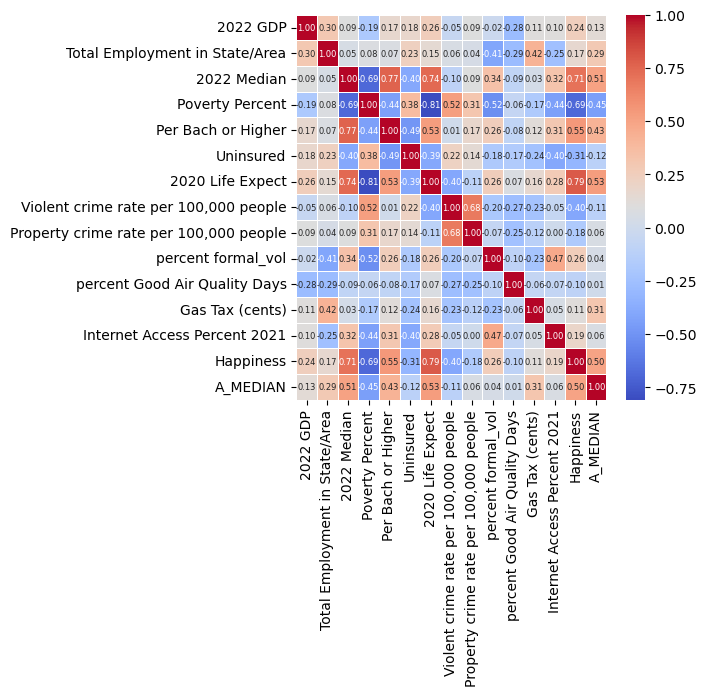

In [38]:
# create a correlation matrix
corr_data_imputed_filtered = data_only_df_imputed_filtered.corr()

# set a larger figure size
plt.figure(figsize=(5, 5))

# plot the heatmap
sns.heatmap(
    corr_data_imputed_filtered,
    annot=True,
    annot_kws={"size": 6},
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
)

plt.show()


In [39]:
sc = StandardScaler()

data_only_df_imputed_filtered_scaled = sc.fit_transform(data_only_df_imputed_filtered)


In [40]:
data_only_df_imputed_filtered_scaled.shape


(51, 15)

In [41]:
# Separate X (features) and y (target values)
# X = data_scaled[:, :-2]  # Exclude the last two columns
# y = data_scaled[:, -2:]  # Last two columns are the target values


In [42]:
# now you can apply PCA
pca = PCA()
pca.fit(data_only_df_imputed_filtered_scaled)
X_pca = pca.transform(data_only_df_imputed_filtered_scaled)


In [43]:
X_pca.shape


(51, 15)

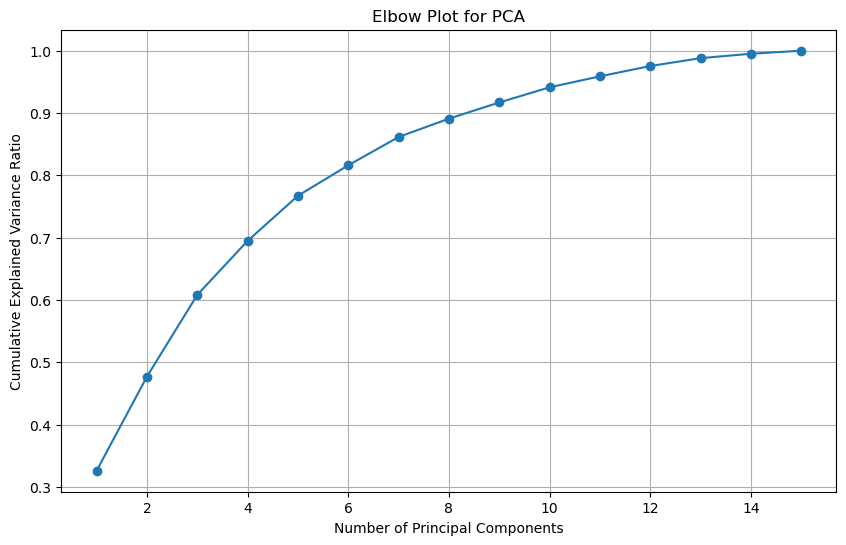

In [44]:
# compute cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(cumulative_var_ratio) + 1),
    cumulative_var_ratio,
    marker="o",
    linestyle="-",
)
plt.title("Elbow Plot for PCA")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.grid(True)
plt.show()


In [45]:
cumulative_var_ratio


array([0.32589391, 0.47699158, 0.60812893, 0.69480912, 0.76719533,
       0.81607559, 0.86154173, 0.89093483, 0.91697455, 0.94125726,
       0.95889186, 0.97542567, 0.98805753, 0.99514017, 1.        ])

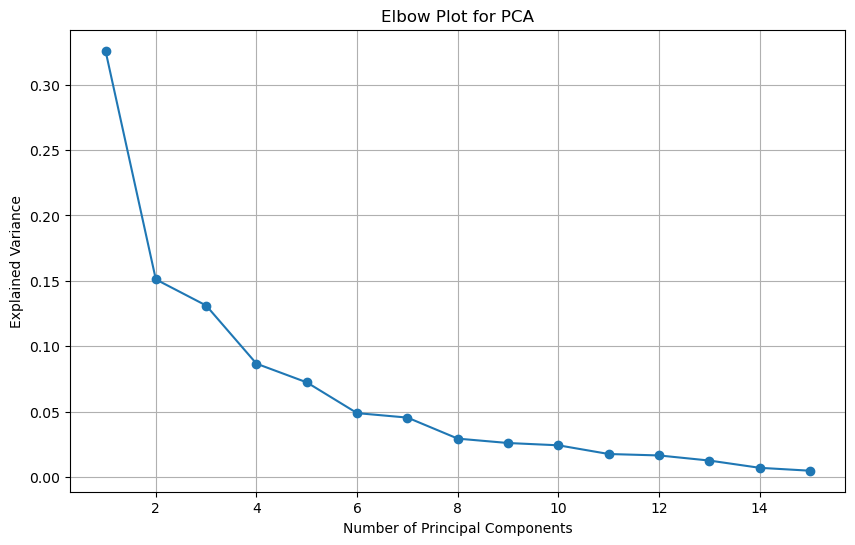

In [46]:
# get the explained variances from PCA
explained_variances = pca.explained_variance_ratio_

# plot the elbow plot for variances
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(explained_variances) + 1),
    explained_variances,
    marker="o",
    linestyle="-",
)
plt.title("Elbow Plot for PCA")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()


In [47]:
explained_variances


array([0.32589391, 0.15109767, 0.13113735, 0.08668019, 0.07238621,
       0.04888026, 0.04546614, 0.0293931 , 0.02603972, 0.02428271,
       0.0176346 , 0.01653381, 0.01263186, 0.00708264, 0.00485983])

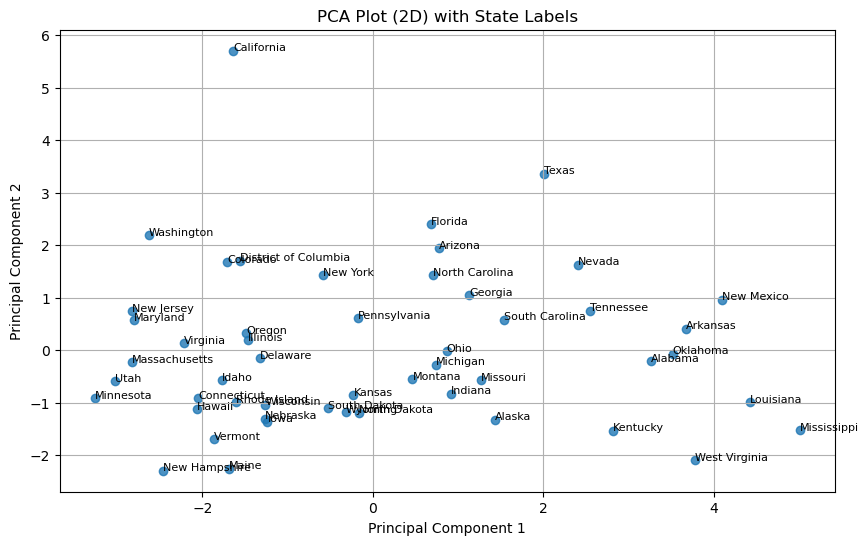

In [48]:
# select the first two principal components
X_pca_2d = X_pca[:, :2]

# plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], marker="o", alpha=0.8)

# plot state labels
for i, label in enumerate(state_names):
    plt.text(X_pca_2d[i, 0], X_pca_2d[i, 1], label, fontsize=8)

plt.title("PCA Plot (2D) with State Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [49]:
X_pca_2d[0:, 0]


array([ 3.2682723 ,  1.43054743,  0.77972879,  3.6756087 , -1.63976289,
       -1.71134967, -2.05152446, -1.32880344, -1.55819692,  0.68115199,
        1.13139566, -2.06230581, -1.77173639, -1.46588875,  0.91797806,
       -1.23590132, -0.22686869,  2.8169382 ,  4.4196467 , -1.68773233,
       -2.80143301, -2.82222342,  0.73754379, -3.25932271,  5.00632894,
        1.26652319,  0.46447691, -1.27053605,  2.40469803, -2.46446749,
       -2.82110853,  4.09377134, -0.58055678,  0.7010379 , -0.15884929,
        0.8665697 ,  3.51667192, -1.48471054, -0.17931757, -1.6105609 ,
        1.53507383, -0.53038242,  2.54345599,  2.00648611, -3.02974742,
       -1.86323205, -2.221025  , -2.6273893 ,  3.77608687, -1.26004438,
       -0.31501482])

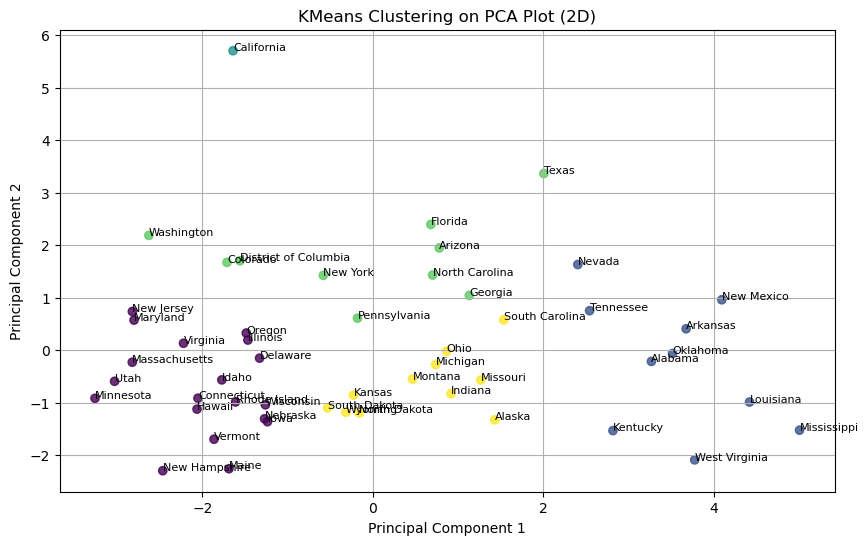

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)

s_score = silhouette_score(X_pca_2d, kmeans.fit_predict(X_pca_2d))

kmeans.fit(X_pca_2d)

cluster_labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels, marker="o", alpha=0.8)


for i, label in enumerate(state_names):
    plt.text(X_pca_2d[i, 0], X_pca_2d[i, 1], label, fontsize=8)

plt.title("KMeans Clustering on PCA Plot (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [51]:
s_score


0.39175222356907713

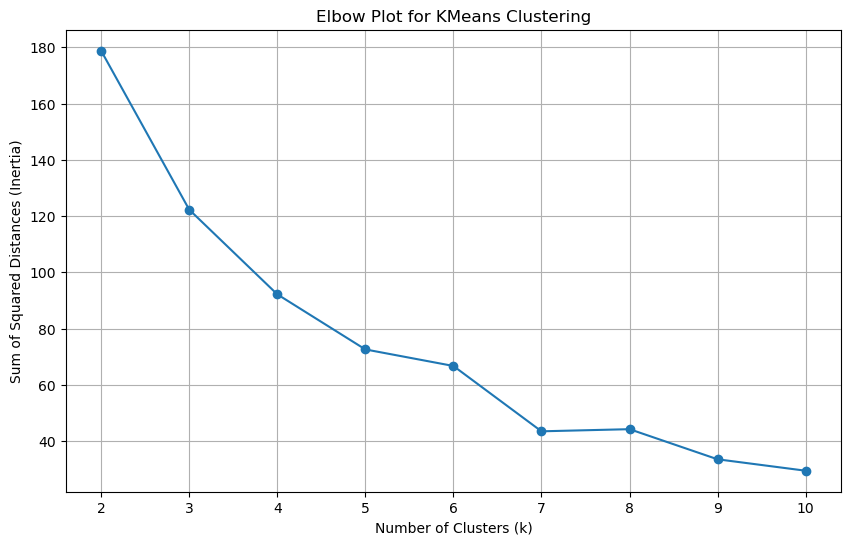

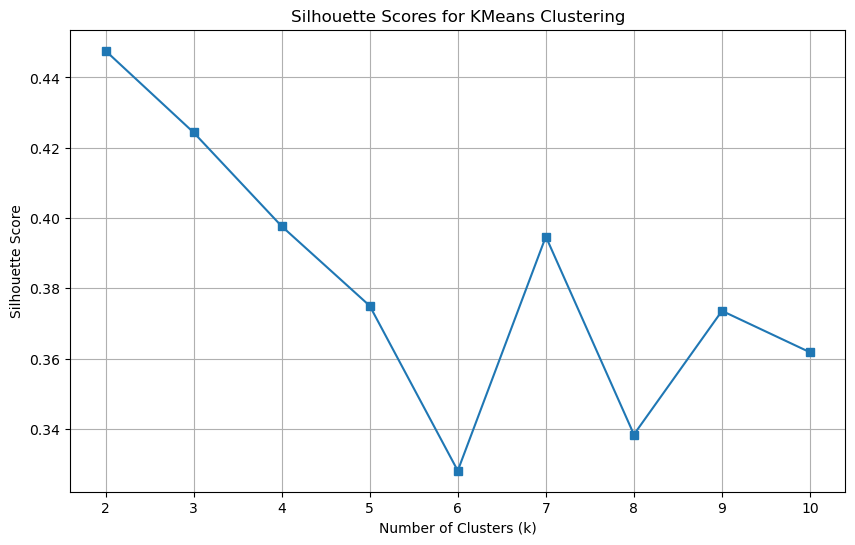

[0.44760160833690027, 0.4243437104636882, 0.3976663061853908, 0.37501180796830375, 0.3280835824293311, 0.3947120105238178, 0.33838671535412757, 0.3735692759640061, 0.36177667114306844]


In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silo_scores = []

k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca_2d)
    inertia.append(kmeans.inertia_)
    silo_score = silhouette_score(X_pca_2d, kmeans.labels_)
    silo_scores.append(silo_score)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker="o", linestyle="-")
plt.title("Elbow Plot for KMeans Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (Inertia)")
plt.xticks(k_values)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_values, silo_scores, marker="s", linestyle="-")
plt.title("Silhouette Scores for KMeans Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()
print(silo_scores)


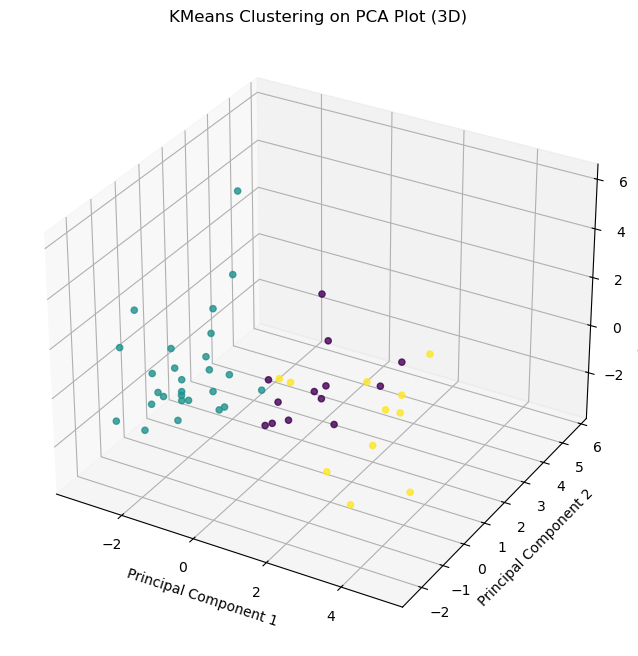

Cluster 2:
Alabama
Alaska
Arkansas
Kentucky
Louisiana
Mississippi
Missouri
New Mexico
Oklahoma
Tennessee
West Virginia

Cluster 0:
Arizona
California
Florida
Georgia
Indiana
Michigan
Nevada
New York
North Carolina
Ohio
Pennsylvania
South Carolina
Texas

Cluster 1:
Colorado
Connecticut
Delaware
District of Columbia
Hawaii
Idaho
Illinois
Iowa
Kansas
Maine
Maryland
Massachusetts
Minnesota
Montana
Nebraska
New Hampshire
New Jersey
North Dakota
Oregon
Rhode Island
South Dakota
Utah
Vermont
Virginia
Washington
Wisconsin
Wyoming



In [53]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X_pca_3d = X_pca[:, :3]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca_3d)
cluster_labels = kmeans.labels_

# plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X_pca_3d[:, 0],
    X_pca_3d[:, 1],
    X_pca_3d[:, 2],
    c=cluster_labels,
    marker="o",
    alpha=0.8,
)

ax.set_title("KMeans Clustering on PCA Plot (3D)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()

from collections import defaultdict

cluster_dict = defaultdict(list)

for i, label in enumerate(state_names):
    cluster_dict[cluster_labels[i]].append(label)

for cluster_label, state_list in cluster_dict.items():
    print(f"Cluster {cluster_label}:")
    for state in state_list:
        print(state)
    print()


In [54]:
# do the first 5 PCs
from sklearn.decomposition import PCA

X_pca_5d = X_pca[:, :5]

kmeans = KMeans(n_clusters=5)

kmeans.fit(X_pca_5d)

cluster_labels = kmeans.labels_

from collections import defaultdict

cluster_dict_5d = defaultdict(list)

for i, label in enumerate(state_names):
    cluster_dict_5d[cluster_labels[i]].append(label)

cluster_dict_5d = dict(cluster_dict_5d)

for cluster_label, state_list in cluster_dict_5d.items():
    print(f"Cluster {cluster_label}: {state_list}")


Cluster 1: ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Louisiana', 'Mississippi', 'Missouri', 'Nevada', 'New Mexico', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas']
Cluster 4: ['California']
Cluster 2: ['Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Hawaii', 'Maryland', 'Massachusetts', 'Minnesota', 'New Jersey', 'New York', 'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 'Washington']
Cluster 0: ['Idaho', 'Maine', 'Nebraska', 'New Hampshire', 'Utah', 'Wyoming']
Cluster 3: ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Michigan', 'Montana', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'West Virginia', 'Wisconsin']


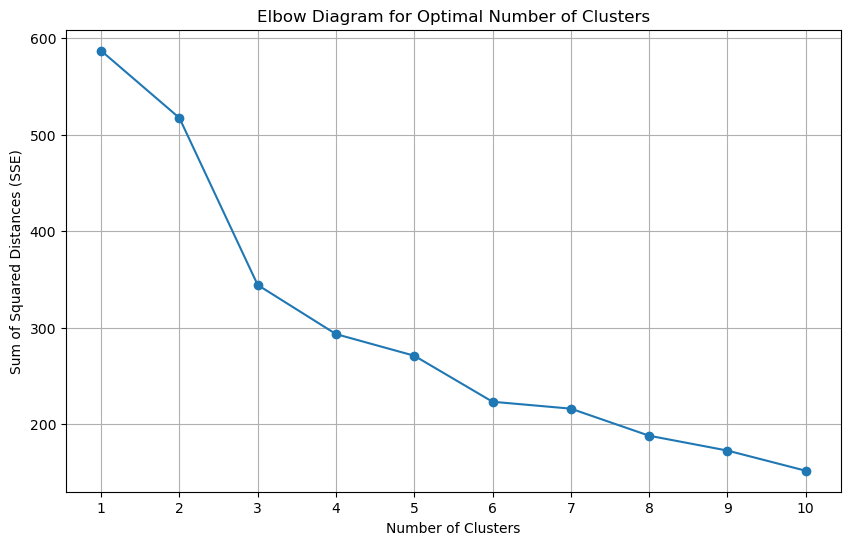

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca_5d)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker="o", linestyle="-")
plt.title("Elbow Diagram for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances (SSE)")
plt.xticks(k_range)
plt.grid(True)
plt.show()


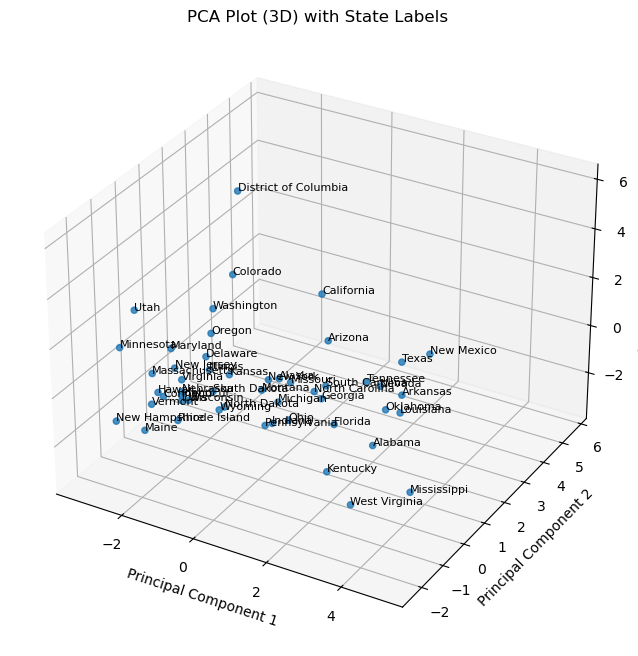

In [56]:
from mpl_toolkits.mplot3d import Axes3D

X_pca_3d = X_pca[:, :3]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], marker="o", alpha=0.8)

for i, label in enumerate(state_names):
    ax.text(X_pca_3d[i, 0], X_pca_3d[i, 1], X_pca_3d[i, 2], label, fontsize=8)

ax.set_title("PCA Plot (3D) with State Labels")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()
